### 텐서플로우로 훈련시킨 모델로 손글씨 예측

In [1]:
from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import np_utils #아래 표현으로 변경되었습니다.
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [5]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [6]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10213, saving model to ./model\02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10213 to 0.08922, saving model to ./model\03-0.0892.hdf5

Epoch 00004: val_loss improved from 0.08922 to 0.07886, saving model to ./model\04-0.0789.hdf5

Epoch 00005: val_loss improved from 0.07886 to 0.07417, saving model to ./model\05-0.0742.hdf5

Epoch 00006: val_loss improved from 0.07417 to 0.06719, saving model to ./model\06-0.0672.hdf5

Epoch 00007: val_loss improved from 0.06719 to 0.06480, saving model to ./model\07-0.0648.hdf5

Epoch 00008: val_loss improved from 0.06480 to 0.06298, saving model to ./model\08-0.0630.hdf5

Epoch 00009: val_loss did not improve from 0.06298

Epoch 00010: val_loss did not improve from 0.06298

Epoch 00011: val_loss did not improve from 0.06298

Epoch 00012: val_loss did not improve from 0.06298

Epoch 00013: val_loss impro

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9833

 Test Accuracy: 0.9833


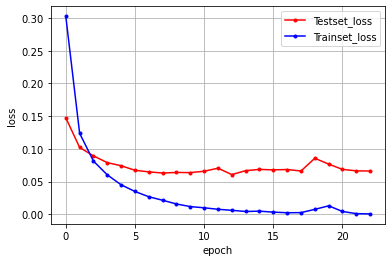

In [10]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#모델을 불러오기
#훈련시킨 모델을 사용하셔도 되고 파일에서 가져오셔도 됩니다.

#from tensorflow.keras.models import Sequential, load_model

#model = load_model('./model/13-0.0606.hdf5') # CNN 모델을 불러옴

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9833

 Test Accuracy: 0.9833


In [12]:
#Test대상의 손글씨 X값들
model.predict(X_test)

array([[2.06614912e-12, 2.43105452e-14, 1.62540641e-11, ...,
        9.99999881e-01, 3.20271726e-11, 1.30724331e-09],
       [2.06685493e-12, 1.24161534e-08, 1.00000000e+00, ...,
        4.17274400e-22, 1.37913838e-11, 1.28716764e-17],
       [2.28762764e-09, 9.99993801e-01, 4.86622298e-07, ...,
        2.16393664e-06, 3.51362178e-06, 4.78575346e-10],
       ...,
       [6.93566387e-21, 4.25682655e-16, 1.78536192e-21, ...,
        1.83159835e-10, 4.90945652e-12, 1.96872563e-09],
       [3.45115307e-14, 5.59300860e-18, 1.00213019e-15, ...,
        5.84432913e-15, 5.48428488e-07, 2.98335881e-18],
       [2.98695361e-14, 7.56048767e-19, 1.30905215e-13, ...,
        8.11780836e-20, 2.39933961e-17, 3.04267800e-18]], dtype=float32)

In [13]:
#모델이 판단한 X값들
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#XTest 리스트의 모양
X_test.shape

(10000, 784)

In [16]:
#XTest 리스트 첫번째 요소인 0번지 요소값의 행렬 모양
X_test[0].shape

(784,)

In [17]:
sample = X_test[0].reshape(1,28,28,1) #opencv로 출력하기 위해 행렬의 모양을 재정의

In [18]:
sample.shape #자료개수, 가로, 세로, 채널

(1, 28, 28, 1)

In [19]:
import cv2

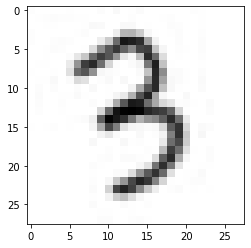

In [20]:
img = cv2.imread('./number_3.jpg',0)
img2 = 255 - img.copy() #흑백 색상 반전
plt.imshow(img2, cmap='Greys')
plt.show()

In [21]:
img2.shape

(28, 28)

In [22]:
img3 = img2.reshape(1, 28, 28, 1) / 255

In [23]:
img3 = img3.reshape(1, 784)

In [24]:
img3.shape

(1, 784)

In [25]:
model.predict_classes(img3)

array([3], dtype=int64)

### 글씨 4를 인식

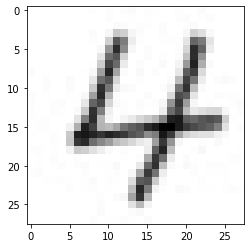

In [26]:
img = cv2.imread('./number_4.jpg',0)
img2 = 255 - img.copy() #흑백 색상 반전
plt.imshow(img2, cmap='Greys')
plt.show()

In [27]:
img3 = img2.reshape(1, 28, 28, 1) / 255

In [28]:
#모델에 맞게 모양 변경
img3 = img3.reshape(1, 784)

In [29]:
model.predict_classes(img3)

array([4], dtype=int64)